In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):
    return 1.0 / (1.0 + np.exp(-t))

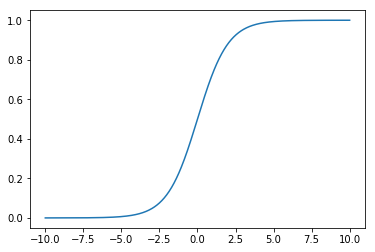

In [3]:
X = np.linspace(-10,10,500)
y = sigmoid(X)

plt.plot(X,y)
plt.show()

损失函数$$J(\theta)=-\frac{1}{m} \sum_{i=1}^{m} y^{(i)} \log \left(\sigma\left(X_{b}^{(i)} \theta\right)\right)+\left(1-y^{(i)}\right) \log \left(1-\sigma\left(X_{b}^{(i)} \theta\right)\right)$$

$$\nabla J(\theta)=\left(\begin{array}{c}{\frac{\partial J(\theta)}{\partial \theta_{\theta}}} \\ {\frac{\partial J(\theta)}{\partial \theta_{1}}} \\ {\ldots} \\ {\frac{\partial J(\theta)}{\partial \theta_{n}}}\end{array}\right)$$

$$\sigma(t)=\frac{1}{1+e^{-t}}=\left(1+e^{-t}\right)^{-1}$$
$$\sigma(t)^{\prime}=-\left(1+e^{-t}\right)^{-2} \cdot e^{-t} \cdot(-1)=\left(1+ e^{-t}\right)^{-2} \cdot e^{-t}$$

$$(\log \sigma(t))^{\prime}=\frac{1}{\sigma(t)} \cdot \sigma(t)^{\prime}=\frac{1}{\sigma(t)} \cdot\left(1+e^{-t}\right)^{-2} \cdot e^{-t} = \frac{1}{\left(1+e^{-t}\right)^{-1}} \cdot\left(1+e^{-t}\right)^{-2} \cdot e^{-t} =\left(1+e^{-t}\right)^{-1} \cdot e^{-t}$$

$$\begin{aligned}(\log \sigma(t))^{\prime} &=\left(1+e^{-t}\right)^{-1} \cdot e^{-t} \\ &=\frac{e^{-t}}{1+e^{-t}}=\frac{1+e^{-t}-1}{1+e^{-t}}=1-\frac{1}{1+e^{-t}} \\ & = 1 -\sigma(t)  \end{aligned}$$

$$\frac{d\left(y^{(i)} \log \sigma\left(X_{b}^{(i)} \theta\right)\right)}{d \theta_{j}}=y^{(i)}\left(1-\sigma\left(X_{b}^{(i)} \theta\right)\right) \cdot X_{j}^{(i)}$$

$$(\log (1-\sigma(t)))^{\prime}=\frac{1}{1-\sigma(t)} \cdot(-1) \cdot \sigma(t)^{\prime}=-\frac{1}{1-\sigma(t)} \cdot\left(1+e^{-t}\right)^{-2} \cdot e^{-t}$$

最终的导数结果为:$\frac{J(\theta)}{\theta_{j}}=\frac{1}{m} \sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) X_{j}^{(i)}$

$$\nabla J(\theta)=\left(\begin{array}{c}{\partial J / \partial \theta_{0}} \\ {\partial J / \partial \theta_{0}} \\ {\partial J / \partial \theta_{1}} \\ {\partial J / \partial \theta_{2}} \\ {\cdots} \\ {\partial J / \partial \theta_{n}}\end{array}\right) = \left(\begin{array}{c}{\sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right)} \\ {\sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) \cdot X_{1}^{(i)}} \\ {\sum_{i=1}^{m}\left(\sigma\left(X_{b}^{(i)} \theta\right)-y^{(i)}\right) \cdot X_{2}^{(i)}} \\ {\sum_{i=1}^{m}\left(\sigma\left(X_{n}^{(i)} \theta\right)-y^{(i)}\right) \cdot X^{(i)}}\end{array}\right) = \frac{1}{m} \cdot \left(\begin{array}{c}{\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)} \\ {\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{1}^{(i)}} \\ {\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{2}^{(i)}} \\ {\cdots} \\ 
{\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{n}^{(i)}}\end{array} \right)$$

回忆在线性回归中：

$$\nabla J(\theta) = \frac{2}{m} \cdot \left(\begin{array}{c}{\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right)} \\ {\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)}} \\ {\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)}} \\ {\cdots} \\ {\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}}\end{array} \right) = \frac2m \cdot X_b^T \cdot (X_b\theta - y)$$

对于逻辑回归来说：

$$\nabla J(\theta) =  \frac{1}{m} \cdot \left(\begin{array}{c}{\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right)} \\ {\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{1}^{(i)}} \\ {\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{2}^{(i)}} \\ {\cdots} \\ 
{\sum_{i=1}^{m}\left(\hat{y}^{(i)}-y^{(i)}\right) \cdot X_{n}^{(i)}}\end{array} \right) = \frac1m \cdot X_b^T \cdot (\sigma(X_b\theta) - y)$$

### 实现逻辑回归

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

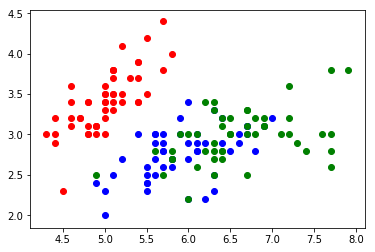

In [6]:
plt.scatter(X[y == 0,0],X[y == 0,1],color="red")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue")
plt.scatter(X[y == 2,0],X[y == 2,1],color="green")
plt.show()

In [7]:
# 剔除掉第三类数据
X = X[y < 2,:2]
y = y [y < 2]

In [8]:
X.shape

(100, 2)

In [9]:
y.shape

(100,)

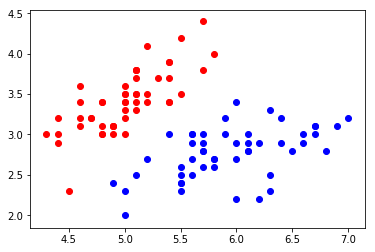

In [10]:
plt.scatter(X[y == 0,0],X[y == 0,1],color="red")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue")
plt.show()

### 使用逻辑回归

In [11]:
from model_selection import train_test_split

In [12]:
X_train,y_train,X_test,y_test = train_test_split(X,y,seed=666)

In [13]:
from LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [14]:
log_reg.score(X_test,y_test)

1.0

In [15]:
log_reg.predict_proba(X_test)

array([9.60794677e-01, 9.95584980e-01, 1.02652530e-01, 1.29631645e-01,
       1.66840904e-02, 7.17920718e-03, 2.40278270e-02, 9.99195183e-01,
       9.91807755e-01, 7.92108368e-01, 2.06390445e-02, 7.85243583e-04,
       2.19583972e-01, 1.66840904e-02, 8.84430666e-01, 8.52839709e-01,
       8.78019588e-01, 2.89906326e-01, 3.29556183e-02, 1.62418014e-01])

In [16]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [17]:
log_reg.coef_

array([ 3.72253385, -6.36127161])

In [18]:
log_reg.interception_

-0.42469344440043505

In [19]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [20]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

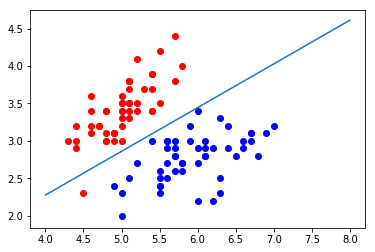

In [21]:
plt.scatter(X[y == 0,0],X[y == 0,1],color="red")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue")
plt.plot(x1_plot,x2_plot)
plt.show()

In [22]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)  # 以不同的颜色进行划分

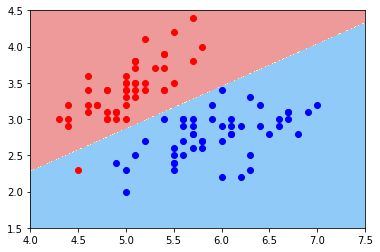

In [24]:
plot_decision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y == 0,0],X[y == 0,1],color="red")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue")
plt.show()

### kNN的决策边界

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
knn_clf.score(X_test,y_test)

1.0

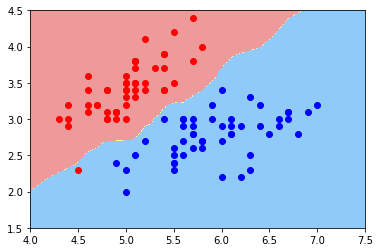

In [30]:
plot_decision_boundary(knn_clf,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y == 0,0],X[y == 0,1],color="red")
plt.scatter(X[y == 1,0],X[y == 1,1],color="blue")
plt.show()

In [31]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2],iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

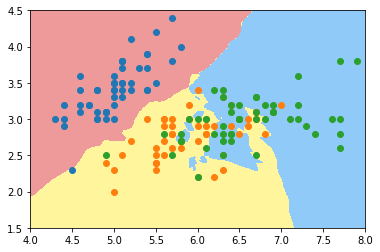

In [35]:
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target == 0,0],iris.data[iris.target == 0,1])
plt.scatter(iris.data[iris.target == 1,0],iris.data[iris.target == 1,1])
plt.scatter(iris.data[iris.target == 2,0],iris.data[iris.target == 2,1])
plt.show()

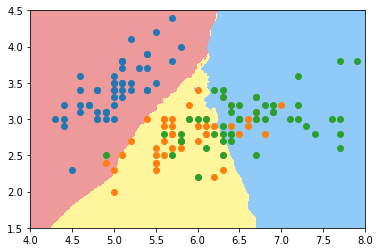

In [39]:
knn_clf_all = KNeighborsClassifier(n_neighbors=60)
knn_clf_all.fit(iris.data[:,:2],iris.target)
plot_decision_boundary(knn_clf_all,axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target == 0,0],iris.data[iris.target == 0,1])
plt.scatter(iris.data[iris.target == 1,0],iris.data[iris.target == 1,1])
plt.scatter(iris.data[iris.target == 2,0],iris.data[iris.target == 2,1])
plt.show()